<a href="https://colab.research.google.com/github/DocBot-Bangkit-2021/DocBot-MachineLearningModels/blob/main/FruitsVegetables/FruitsVegetables_Baseline_Model_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns

import os
import zipfile
import shutil

In [2]:
plt.style.use('seaborn')

# **Data Loading**

[Fruits-262](https://www.kaggle.com/aelchimminut/fruits262)

[Fresh and Stale Images of Fruits and Vegetables](https://www.kaggle.com/raghavrpotdar/fresh-and-stale-images-of-fruits-and-vegetables?select=fresh_apple)

[Tomato Cultivars](https://www.kaggle.com/olgabelitskaya/tomato-cultivars?select=01_019.png)

[Fruits 360](https://www.kaggle.com/moltean/fruits)

[Fruits & Vegetables](https://www.kaggle.com/jorgebailon/fruits-vegetables)

[fruits_vegetables_photos](https://www.kaggle.com/balalexv/fruits-vegetables-photos?select=TRAIN)

This dataset contains image data of fruits and vegetables. With six classes namely:

* `Banana`  :  3070 images
* `Apple`  :  3352 images
* `Orange`  :  2977 images
* `Tomato`  :  442 images
* `Broccoli`  :  315 images
* `Carrot`  :  1001 images

**Link for dataset in Google Drive**

https://drive.google.com/file/d/1ruaStccmRUdgpxlI5lD2LDWH9nxoc9VY/view?usp=sharing

In [3]:
# Use this to download easily (only on google colab)
# !gdown --id 1ruaStccmRUdgpxlI5lD2LDWH9nxoc9VY

**Download dataset in Google Drive**

In [4]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
link = 'https://drive.google.com/file/d/1ruaStccmRUdgpxlI5lD2LDWH9nxoc9VY/view?usp=sharing' # The shareable link

In [6]:
# fluff, id = link.split('d/')
id = link.split('d/')[1].split('/view?')[0]
print (id)

1ruaStccmRUdgpxlI5lD2LDWH9nxoc9VY


In [7]:
downloaded = drive.CreateFile({'id':id})  #drive from PyDrive
downloaded.GetContentFile('fruitsvegetables.zip')  

In [8]:
file_zip = 'fruitsvegetables.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('./fruitsvegetables/')
zip_ref.close()

In [9]:
dir = './fruitsvegetables/'
list_category = sorted(os.listdir(dir))
list_category

['apple', 'banana', 'broccoli', 'carrot', 'orange', 'tomato']

# **Data Arrange**

In [10]:
# make directory name for data training and validation (test) 
train_directory = os.path.join(dir, 'train')
validation_directory = os.path.join(dir, 'val')

# check if already exists
if not os.path.exists(train_directory) :
  os.mkdir(train_directory)

if not os.path.exists(validation_directory) :
  os.mkdir(validation_directory)

In [11]:
# check a lot of data for :
# {'apple': 0, 'banana': 1, 'broccoli': 2, 'carrot': 3, 'orange': 4, 'tomato': 5}
apple_dir = os.path.join(dir,'apple')
banana_dir = os.path.join(dir, 'banana')
broccoli_dir = os.path.join(dir, 'broccoli')
carrot_dir = os.path.join(dir,'carrot')
orange_dir = os.path.join(dir, 'orange')
tomato_dir = os.path.join(dir, 'tomato')

print("Apple :", len(os.listdir(apple_dir)))
print("Banana :", len(os.listdir(banana_dir))) 
print("Broccoli :", len(os.listdir(broccoli_dir)))
print("Carrot :", len(os.listdir(carrot_dir)))
print("Orange :", len(os.listdir(orange_dir))) 
print("Tomato :", len(os.listdir(tomato_dir)))

Apple : 3352
Banana : 3070
Broccoli : 315
Carrot : 1001
Orange : 2977
Tomato : 442


In [12]:
from sklearn.model_selection import train_test_split
train_apple_dir, val_apple_dir = train_test_split(os.listdir(apple_dir), test_size = 0.2, random_state=43)
train_banana_dir, val_banana_dir = train_test_split(os.listdir(banana_dir), test_size = 0.2, random_state=43)
train_broccoli_dir, val_broccoli_dir = train_test_split(os.listdir(broccoli_dir), test_size = 0.2, random_state=43)
train_carrot_dir, val_carrot_dir = train_test_split(os.listdir(carrot_dir), test_size = 0.2, random_state=43)
train_orange_dir, val_orange_dir = train_test_split(os.listdir(orange_dir), test_size = 0.2, random_state=43)
train_tomato_dir, val_tomato_dir = train_test_split(os.listdir(tomato_dir), test_size = 0.2, random_state=43)

In [13]:
# spread dir data for train and test (validation)
datasets = [train_directory, validation_directory]

train_apple = os.path.join(train_directory, 'apple')
train_banana = os.path.join(train_directory, 'banana')
train_broccoli = os.path.join(train_directory, 'broccoli')
train_carrot = os.path.join(train_directory, 'carrot')
train_orange = os.path.join(train_directory, 'orange')
train_tomato = os.path.join(train_directory, 'tomato')

val_apple = os.path.join(validation_directory, 'apple')
val_banana = os.path.join(validation_directory, 'banana')
val_broccoli = os.path.join(validation_directory, 'broccoli')
val_carrot = os.path.join(validation_directory, 'carrot')
val_orange = os.path.join(validation_directory, 'orange')
val_tomato = os.path.join(validation_directory, 'tomato')

In [14]:
train_sets = [train_apple, train_banana, train_broccoli, train_carrot, train_orange, train_tomato]
for item in train_sets :
  if not os.path.exists(item):
    os.mkdir(item)

val_sets = [val_apple, val_banana, val_broccoli, val_carrot, val_orange, val_tomato]
for item in val_sets :
  if not os.path.exists(item):
    os.mkdir(item)

In [15]:
category_sets = [apple_dir, banana_dir, broccoli_dir, carrot_dir, orange_dir, tomato_dir]
train_category_sets = [train_apple_dir, train_banana_dir, train_broccoli_dir, train_carrot_dir, train_orange_dir, train_tomato_dir]
val_category_sets = [val_apple_dir, val_banana_dir, val_broccoli_dir, val_carrot_dir, val_orange_dir, val_tomato_dir]

for i in range(len(category_sets)):
  for item in train_category_sets[i]:
    shutil.copy(os.path.join(category_sets[i], item), os.path.join(train_sets[i], item))

for i in range(len(category_sets)):
  for item in val_category_sets[i]:
    shutil.copy(os.path.join(category_sets[i], item), os.path.join(val_sets[i], item))

In [16]:
for i, category in enumerate(train_sets):
  print('train ',list_category[i],' = ',len(os.listdir(category)))

for i, category in enumerate(val_sets):
  print('val ',list_category[i],' = ',len(os.listdir(category)))

train  apple  =  2681
train  banana  =  2456
train  broccoli  =  252
train  carrot  =  800
train  orange  =  2381
train  tomato  =  353
val  apple  =  671
val  banana  =  614
val  broccoli  =  63
val  carrot  =  201
val  orange  =  596
val  tomato  =  89


**Split Folder**

In [17]:
#!pip install split-folders
#import splitfolders

#membagi data menjadi 2 training dan validation, dengan rasio training 80% dan validation 40%
#splitfolders.ratio(path, '/content/data_result', seed=1337, ratio=(.8,.1,.1), group_prefix=None)

# **Exploratory Data Analyis (EDA)**

In [18]:
print(list_category)

['apple', 'banana', 'broccoli', 'carrot', 'orange', 'tomato']


In [19]:
# check a lot of data for paper, rock and scissors
for  item in list_category:
  class_dir = os.path.join(dir,item)
  print(item ," : ",len(os.listdir(class_dir)),"images")

apple  :  3352 images
banana  :  3070 images
broccoli  :  315 images
carrot  :  1001 images
orange  :  2977 images
tomato  :  442 images


In [20]:
# delete dir that is not used
# import shutil

# list_category = ['apple', 'banana', 'broccoli', 'carrot', 'orange', 'tomato']

# for x in listdir_image:
#   if x not in list_category:
#     path = os.path.join(dir_image, x)
#     if os.path.isfile(path):
#         os.remove(path)
#     elif os.path.isdir(path):
#         shutil.rmtree(path)
#     else:
#         print("Unknown or already remove!")

# listdir_image = os.listdir(dir_image)
# listdir_image

In [21]:
# check image (count, size, total)
from PIL import Image
total = 0

for x in list_category:
  dir_cat = os.path.join(dir, x)
  y = len(os.listdir(dir_cat))
  print(x+':', y)
  total = total + y
  
  size = (0,0)
  img_name = os.listdir(dir_cat)
  for i in range(5):
    img_path = os.path.join(dir_cat, img_name[i])
    img = Image.open(img_path)
    
    if size == img.size:
      continue
    else :
      size = img.size
      print('+ size = ',img.size)

print('\nTotal :', total)

apple: 3352
+ size =  (416, 448)
+ size =  (296, 336)
+ size =  (256, 256)
+ size =  (404, 390)
+ size =  (372, 370)
banana: 3070
+ size =  (614, 392)
+ size =  (494, 420)
+ size =  (602, 448)
+ size =  (708, 490)
+ size =  (256, 256)
broccoli: 315
+ size =  (480, 320)
+ size =  (400, 400)
+ size =  (480, 343)
+ size =  (2234, 1658)
+ size =  (480, 319)
carrot: 1001
+ size =  (235, 235)
+ size =  (180, 281)
+ size =  (350, 225)
+ size =  (800, 140)
+ size =  (600, 450)
orange: 2977
+ size =  (458, 374)
+ size =  (404, 330)
+ size =  (390, 382)
+ size =  (384, 364)
+ size =  (354, 322)
tomato: 442
+ size =  (600, 489)
+ size =  (160, 160)
+ size =  (100, 100)
+ size =  (160, 160)

Total : 11157


apple


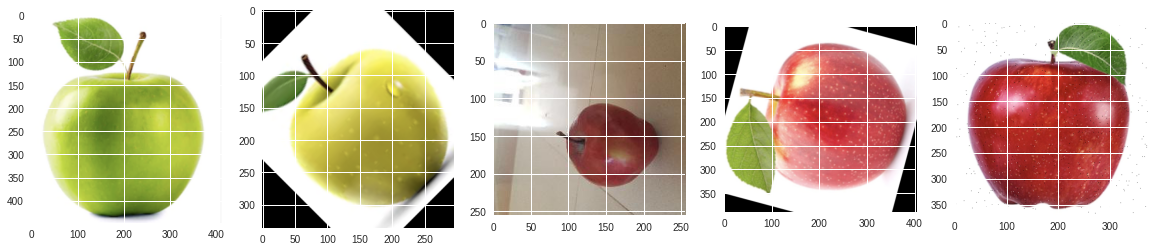

banana


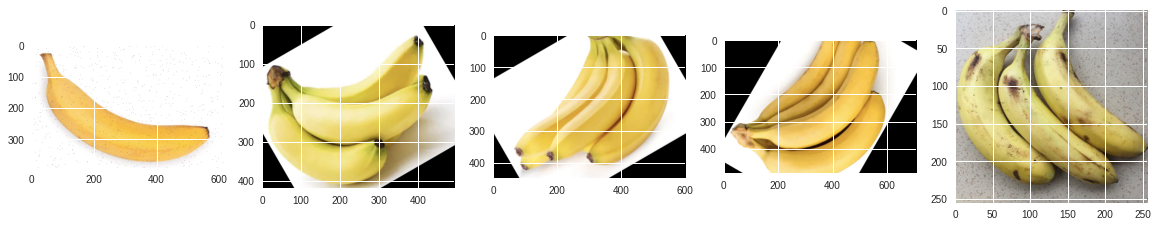

broccoli


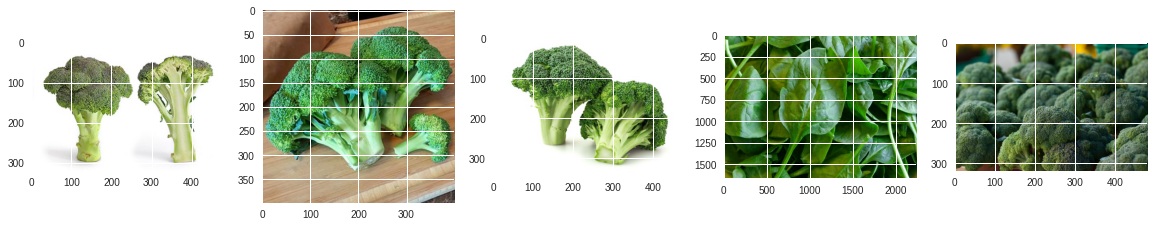

carrot


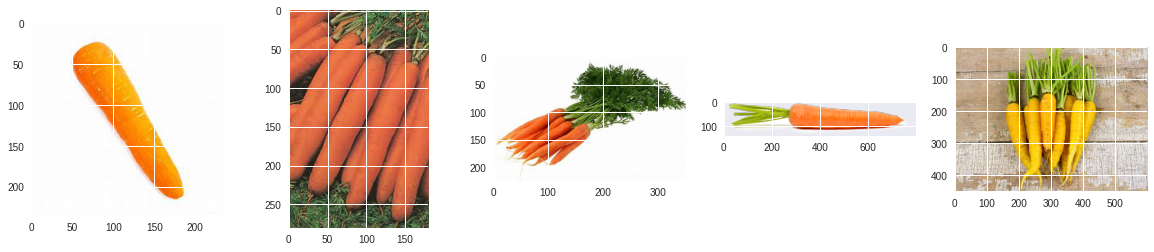

orange


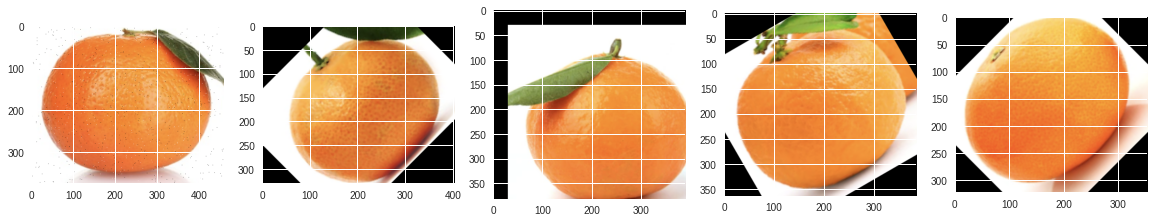

tomato


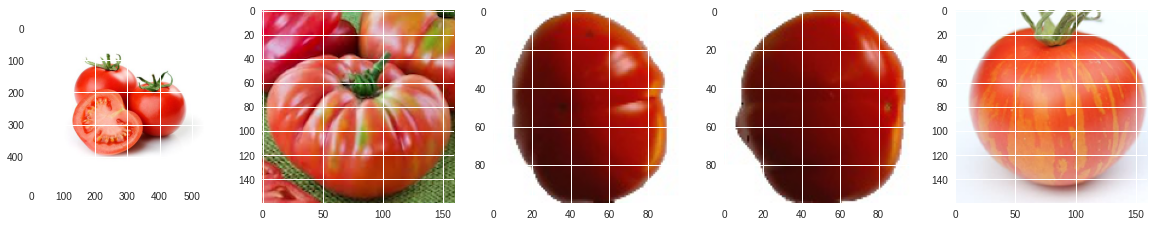

In [22]:
# check images class
for  item in list_category:
  print(item)
  class_dir = os.path.join(dir,item)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.imshow(img)
  plt.show()

# **Data Modeling 01**

## **Image Augmentation**

In [23]:
# import library for Machine Learning
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

In [24]:
# make imagedatagenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    zoom_range=0.2,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode = 'nearest')
val_datagen = ImageDataGenerator(rescale=1./255,)

In [25]:
batch_size = 128
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size =(150,150),
    batch_size = batch_size,
    shuffle=True,
    class_mode = 'categorical'
)

validation_generator = train_datagen.flow_from_directory(
    validation_directory,
    target_size = (150,150),
    batch_size = batch_size,
    shuffle=True,
    class_mode = 'categorical'
)

Found 8921 images belonging to 6 classes.
Found 2234 images belonging to 6 classes.


In [26]:
train_generator.class_indices

{'apple': 0, 'banana': 1, 'broccoli': 2, 'carrot': 3, 'orange': 4, 'tomato': 5}

In [27]:
validation_generator.class_indices

{'apple': 0, 'banana': 1, 'broccoli': 2, 'carrot': 3, 'orange': 4, 'tomato': 5}

In [28]:
label_types = []
for category in train_generator.class_indices:
  label_types.append(category)
label_types

['apple', 'banana', 'broccoli', 'carrot', 'orange', 'tomato']

## **Train Model 01**

In [29]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0

In [31]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'RMSprop',
              metrics=['accuracy'])

In [32]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [33]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [34]:
mc = ModelCheckpoint('best_model_2_v1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [35]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/50
69/69 [==============================] - ETA: 0s - loss: 1.6100 - accuracy: 0.3230

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


69/69 [==============================] - 124s 1s/step - loss: 1.6100 - accuracy: 0.3230 - val_loss: 1.3334 - val_accuracy: 0.3768

Epoch 00001: val_accuracy improved from -inf to 0.37684, saving model to best_model_2_v1.h5
Epoch 2/50
69/69 [==============================] - 90s 1s/step - loss: 1.1414 - accuracy: 0.5412 - val_loss: 0.8387 - val_accuracy: 0.6517

Epoch 00002: val_accuracy improved from 0.37684 to 0.65165, saving model to best_model_2_v1.h5
Epoch 3/50
69/69 [==============================] - 89s 1s/step - loss: 0.8384 - accuracy: 0.6797 - val_loss: 0.7704 - val_accuracy: 0.7082

Epoch 00003: val_accuracy improved from 0.65165 to 0.70818, saving model to best_model_2_v1.h5
Epoch 4/50
69/69 [==============================] - 89s 1s/step - loss: 0.5949 - accuracy: 0.7905 - val_loss: 0.9448 - val_accuracy: 0.7270

Epoch 00004: val_accuracy improved from 0.70818 to 0.72702, saving model to best_model_2_v1.h5
Epoch 5/50
69/69 [==============================] - 89s 1s/step - los

In [36]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

10/70 [===>..........................] - ETA: 1:01 - loss: 0.2527 - accuracy: 0.9039

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 6/18 [=========>....................] - ETA: 10s - loss: 0.2324 - accuracy: 0.9089

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


18/18 [==============================] - 18s 996ms/step - loss: 0.2164 - accuracy: 0.9145
Accuracy (train):  0.9123416543006897
Accuracy: (test) 0.9145031571388245


### **Plot Model**

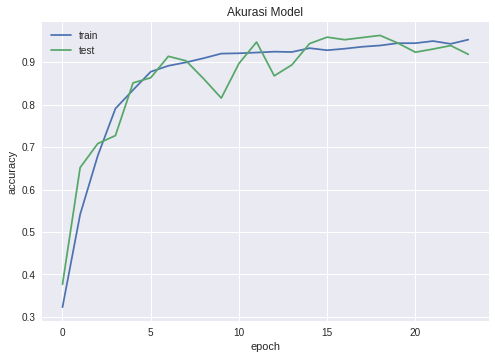

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

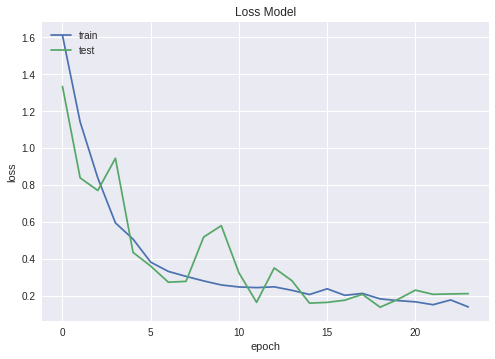

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

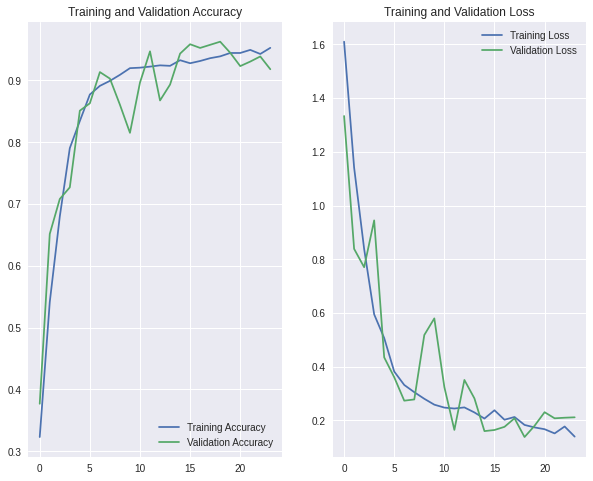

In [39]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving apple.jpg to apple.jpg
Apple


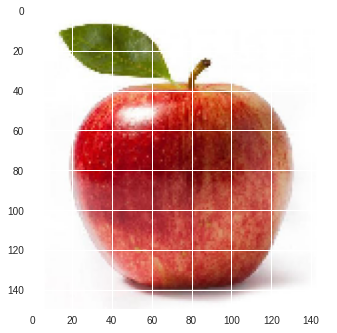

In [40]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [41]:
classes

array([[4.8478740e-01, 7.0268888e-04, 3.2357941e-04, 1.3089758e-01,
        5.0262730e-03, 3.7826252e-01]], dtype=float32)

### **Save Model**

In [42]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 232
drwxr-xr-x 2 root root   4096 Jun  3 07:14 assets
-rw-r--r-- 1 root root  22143 Jun  3 07:14 keras_metadata.pb
-rw-r--r-- 1 root root 203040 Jun  3 07:14 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 07:14 variables


In [43]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v1.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v1.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [44]:
try:
    files.download('fruitsvegetable_02_v1.tflite')
    files.download('fruitsvegetable_02_v1.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [45]:
from keras.models import load_model
saved_model = load_model('best_model_2_v1.h5')

In [46]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 232
drwxr-xr-x 2 root root   4096 Jun  3 07:14 assets
-rw-r--r-- 1 root root  22143 Jun  3 07:14 keras_metadata.pb
-rw-r--r-- 1 root root 201673 Jun  3 07:14 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 07:14 variables


In [47]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v1_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v1_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [48]:
try:
    files.download('fruitsvegetable_02_v1_best.tflite')
    files.download('fruitsvegetable_02_v1_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 02**

In [49]:
import tensorflow as tf
# from tensorflow.keras import applications, optimizers

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [51]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [52]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [53]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [54]:
mc = ModelCheckpoint('best_model_2_v2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [55]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/50
 3/69 [>.............................] - ETA: 35s - loss: 1.6424 - accuracy: 0.2135

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


69/69 [==============================] - ETA: 0s - loss: 0.8328 - accuracy: 0.6851

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


69/69 [==============================] - 92s 1s/step - loss: 0.8328 - accuracy: 0.6851 - val_loss: 0.4034 - val_accuracy: 0.8681

Epoch 00001: val_accuracy improved from -inf to 0.86811, saving model to best_model_2_v2.h5
Epoch 2/50
69/69 [==============================] - 89s 1s/step - loss: 0.3526 - accuracy: 0.8817 - val_loss: 0.2478 - val_accuracy: 0.9104

Epoch 00002: val_accuracy improved from 0.86811 to 0.91039, saving model to best_model_2_v2.h5
Epoch 3/50
69/69 [==============================] - 89s 1s/step - loss: 0.2525 - accuracy: 0.9158 - val_loss: 0.2225 - val_accuracy: 0.9223

The accuracy of the training set and the validation set has reached > 99%!

Epoch 00003: val_accuracy improved from 0.91039 to 0.92233, saving model to best_model_2_v2.h5


In [56]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

18/70 [======>.......................] - ETA: 54s - loss: 0.2176 - accuracy: 0.9266

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


13/18 [====================>.........] - ETA: 4s - loss: 0.2547 - accuracy: 0.9189

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


18/18 [==============================] - 18s 979ms/step - loss: 0.2410 - accuracy: 0.9208
Accuracy (train):  0.920973002910614
Accuracy: (test) 0.9207699298858643


### **Plot Model**

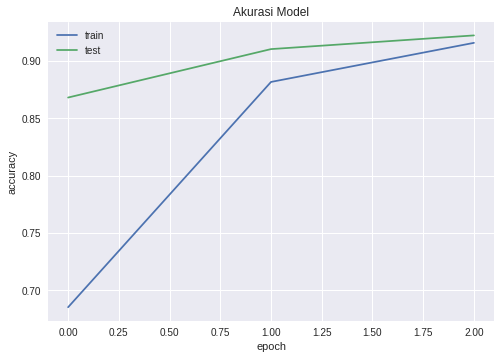

In [57]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

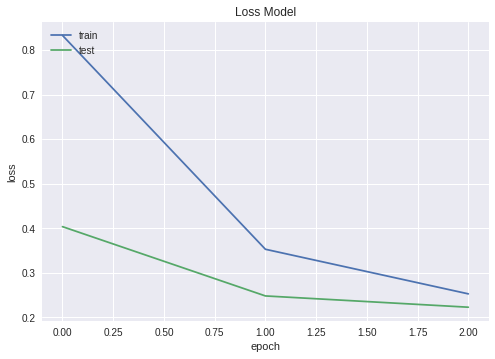

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

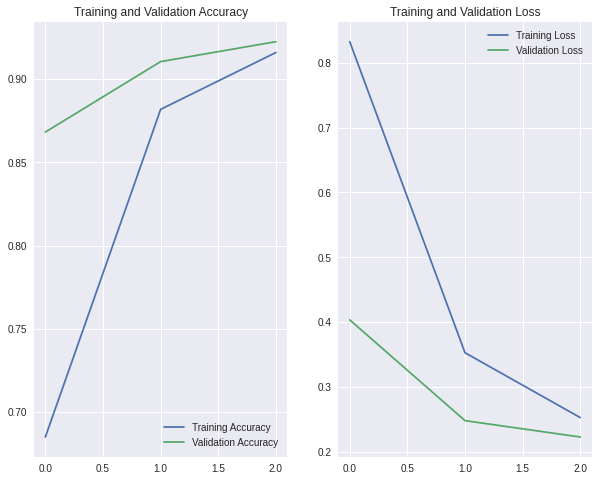

In [59]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving banana.jpg to banana.jpg
Banana


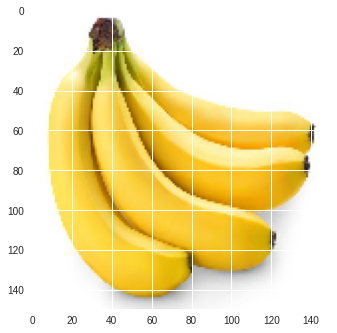

In [60]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [61]:
classes

array([[3.4898691e-05, 9.0037072e-01, 4.1345179e-06, 1.9756575e-05,
        9.9570408e-02, 1.1573578e-07]], dtype=float32)

### **Save Model**

In [62]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 244
drwxr-xr-x 2 root root   4096 Jun  3 07:20 assets
-rw-r--r-- 1 root root  23532 Jun  3 07:20 keras_metadata.pb
-rw-r--r-- 1 root root 215869 Jun  3 07:20 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 07:20 variables


In [63]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v2.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v2.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [64]:
try:
    files.download('fruitsvegetable_02_v2.tflite')
    files.download('fruitsvegetable_02_v2.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**


In [65]:
from keras.models import load_model
saved_model = load_model('best_model_2_v2.h5')

In [66]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 244
drwxr-xr-x 2 root root   4096 Jun  3 07:20 assets
-rw-r--r-- 1 root root  23532 Jun  3 07:20 keras_metadata.pb
-rw-r--r-- 1 root root 214109 Jun  3 07:20 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 07:20 variables


In [67]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v2_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v2_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [68]:
try:
    files.download('fruitsvegetable_02_v2_best.tflite')
    files.download('fruitsvegetable_02_v2_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 03**

In [69]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(6, activation='softmax')
])

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)       

In [71]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [72]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [73]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [74]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [75]:
mc = ModelCheckpoint('best_model_2_v3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [76]:
# history = model.fit(train_generator,
#                               validation_data=validation_generator,
#                               steps_per_epoch=100,
#                               epochs=15,
#                               validation_steps=50,
#                               verbose=2)

In [77]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


69/69 [==============================] - ETA: 0s - loss: 1.3542 - accuracy: 0.4485

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


69/69 [==============================] - 91s 1s/step - loss: 1.3542 - accuracy: 0.4485 - val_loss: 1.1325 - val_accuracy: 0.5184

Epoch 00001: val_accuracy improved from -inf to 0.51838, saving model to best_model_2_v3.h5
Epoch 2/50
69/69 [==============================] - 89s 1s/step - loss: 0.9471 - accuracy: 0.6462 - val_loss: 0.7461 - val_accuracy: 0.7031

Epoch 00002: val_accuracy improved from 0.51838 to 0.70312, saving model to best_model_2_v3.h5
Epoch 3/50
69/69 [==============================] - 89s 1s/step - loss: 0.6549 - accuracy: 0.7657 - val_loss: 0.6780 - val_accuracy: 0.7532

Epoch 00003: val_accuracy improved from 0.70312 to 0.75322, saving model to best_model_2_v3.h5
Epoch 4/50
69/69 [==============================] - 89s 1s/step - loss: 0.5593 - accuracy: 0.8213 - val_loss: 0.3396 - val_accuracy: 0.8856

Epoch 00004: val_accuracy improved from 0.75322 to 0.88557, saving model to best_model_2_v3.h5
Epoch 5/50
69/69 [==============================] - 89s 1s/step - loss

In [78]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

 2/70 [..............................] - ETA: 1:03 - loss: 0.1740 - accuracy: 0.9453

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 5/18 [=======>......................] - ETA: 11s - loss: 0.2244 - accuracy: 0.9250

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


18/18 [==============================] - 18s 989ms/step - loss: 0.2241 - accuracy: 0.9293
Accuracy (train):  0.928931713104248
Accuracy: (test) 0.92927485704422


### **Plot Model**

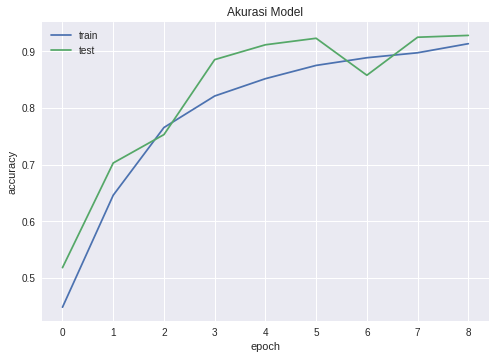

In [79]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

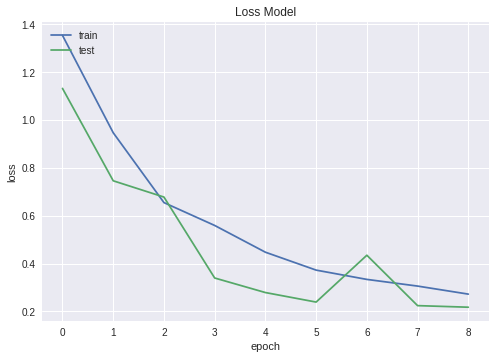

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

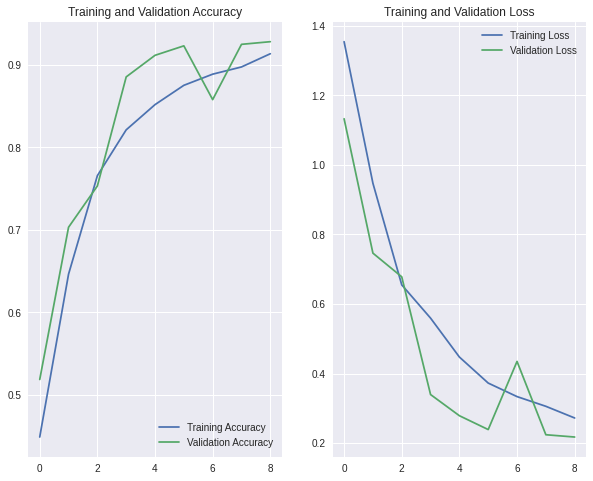

In [81]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving broccoli.jpg to broccoli.jpg
Broccoli


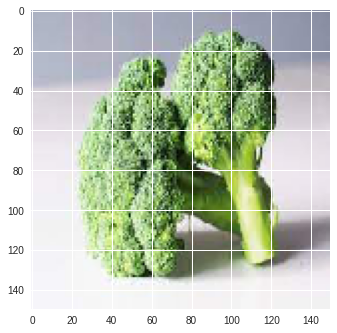

In [82]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [83]:
classes

array([[5.9798900e-03, 5.8011868e-04, 9.1837758e-01, 6.4966746e-02,
        3.1394957e-04, 9.7816875e-03]], dtype=float32)

### **Save Model**

In [84]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 252
drwxr-xr-x 2 root root   4096 Jun  3 07:41 assets
-rw-r--r-- 1 root root  26746 Jun  3 07:41 keras_metadata.pb
-rw-r--r-- 1 root root 217445 Jun  3 07:41 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 07:41 variables


In [85]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v3.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v3.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [86]:
try:
    files.download('fruitsvegetable_02_v3.tflite')
    files.download('fruitsvegetable_02_v3.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [87]:
from keras.models import load_model
saved_model = load_model('best_model_2_v3.h5')

In [88]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 248
drwxr-xr-x 2 root root   4096 Jun  3 07:41 assets
-rw-r--r-- 1 root root  26746 Jun  3 07:41 keras_metadata.pb
-rw-r--r-- 1 root root 215582 Jun  3 07:41 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 07:41 variables


In [89]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v3_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v3_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [90]:
try:
    files.download('fruitsvegetable_02_v3_best.tflite')
    files.download('fruitsvegetable_02_v3_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 04**

In [91]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')  
])
model.layers[0].trainable = False

234553344/234545216 [==============================] - 3s 0us/step


In [92]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 5, 5, 2048)        58331648  
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 1542      
Total params: 84,679,430
Trainable params: 26,347,782
Non-trainable params: 58,331,648
_________________________________

In [93]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [94]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [95]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [96]:
mc = ModelCheckpoint('best_model_2_v4.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [97]:
# history = model.fit(train_generator,
#                               validation_data=validation_generator,
#                               steps_per_epoch=100,
#                               epochs=15,
#                               validation_steps=50,
#                               verbose=2)

In [98]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


69/69 [==============================] - ETA: 0s - loss: 5.4007 - accuracy: 0.8592

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


69/69 [==============================] - 114s 2s/step - loss: 5.4007 - accuracy: 0.8592 - val_loss: 0.2429 - val_accuracy: 0.9550

Epoch 00001: val_accuracy improved from -inf to 0.95496, saving model to best_model_2_v4.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
69/69 [==============================] - 101s 1s/step - loss: 0.4223 - accuracy: 0.9268 - val_loss: 0.3291 - val_accuracy: 0.9517

The accuracy of the training set and the validation set has reached > 99%!

Epoch 00002: val_accuracy did not improve from 0.95496


In [99]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

 4/70 [>.............................] - ETA: 1:16 - loss: 0.3765 - accuracy: 0.9531

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 8/18 [============>.................] - ETA: 11s - loss: 0.1532 - accuracy: 0.9629

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


18/18 [==============================] - 22s 1s/step - loss: 0.2980 - accuracy: 0.9543
Accuracy (train):  0.9550498723983765
Accuracy: (test) 0.9543420076370239


### **Plot Model**

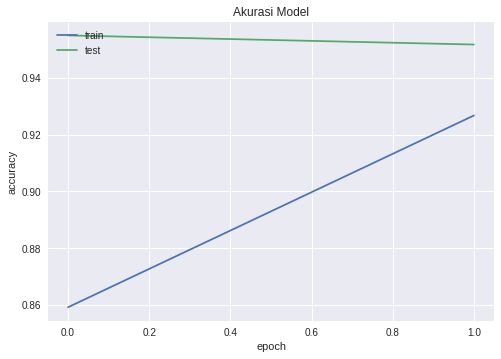

In [100]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

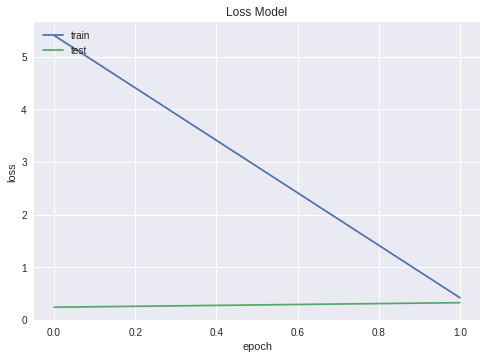

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

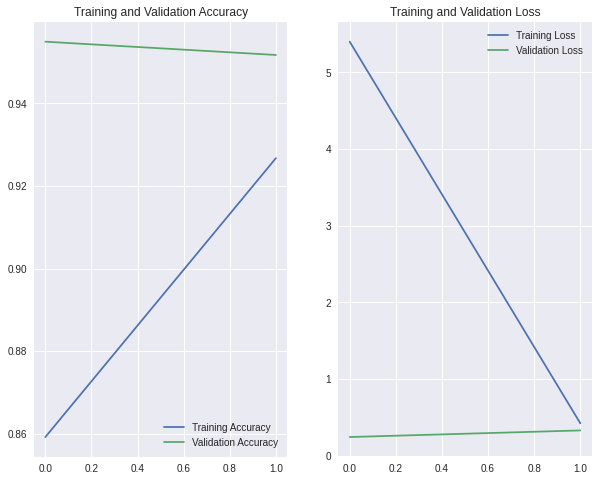

In [102]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving carrot.jpg to carrot.jpg
Carrot


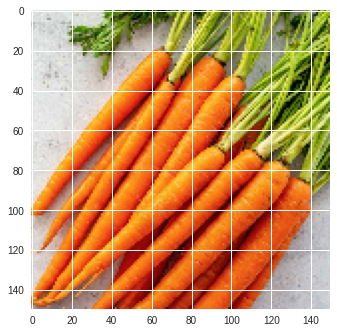

In [103]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [104]:
classes

array([[9.3119476e-34, 3.7989159e-32, 2.3401258e-37, 1.0000000e+00,
        2.2668735e-22, 2.1322787e-29]], dtype=float32)

### **Save Model**

In [105]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 15184
drwxr-xr-x 2 root root     4096 Jun  3 07:50 assets
-rw-r--r-- 1 root root  1735735 Jun  3 07:50 keras_metadata.pb
-rw-r--r-- 1 root root 13803359 Jun  3 07:50 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  3 07:50 variables


In [106]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v4.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v4.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [107]:
try:
    files.download('fruitsvegetable_02_v4.tflite')
    files.download('fruitsvegetable_02_v4.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [108]:
from keras.models import load_model
saved_model = load_model('best_model_2_v4.h5')

In [109]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up



/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 15192
drwxr-xr-x 2 root root     4096 Jun  3 07:52 assets
-rw-r--r-- 1 root root  1735734 Jun  3 07:52 keras_metadata.pb
-rw-r--r-- 1 root root 13807976 Jun  3 07:52 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  3 07:52 variables


In [110]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v4_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v4_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [111]:
try:
    files.download('fruitsvegetable_02_v4_best.tflite')
    files.download('fruitsvegetable_02_v4_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 05**

In [112]:
from tensorflow.keras.applications.densenet import DenseNet121

model = tf.keras.Sequential([
    DenseNet121(
        include_top=False,
        weights='imagenet',
        input_shape=(150, 150, 3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(6, activation='softmax')
])

29089792/29084464 [==============================] - 0s 0us/step


In [113]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 4, 4, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)              

In [114]:
do_fine_tuning = True #@param {type:"boolean"}

if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.9)
else:
    optimizer = "adam"

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [115]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [116]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [117]:
mc = ModelCheckpoint('best_model_2_v5.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [118]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


69/69 [==============================] - ETA: 0s - loss: 0.7873 - accuracy: 0.7344

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


69/69 [==============================] - 140s 2s/step - loss: 0.7873 - accuracy: 0.7344 - val_loss: 0.3017 - val_accuracy: 0.9145

Epoch 00001: val_accuracy improved from -inf to 0.91452, saving model to best_model_2_v5.h5
Epoch 2/50
69/69 [==============================] - 105s 2s/step - loss: 0.0991 - accuracy: 0.9725 - val_loss: 0.0837 - val_accuracy: 0.9665

Epoch 00002: val_accuracy improved from 0.91452 to 0.96645, saving model to best_model_2_v5.h5
Epoch 3/50
69/69 [==============================] - 106s 2s/step - loss: 0.0435 - accuracy: 0.9892 - val_loss: 0.0356 - val_accuracy: 0.9894

Epoch 00003: val_accuracy improved from 0.96645 to 0.98943, saving model to best_model_2_v5.h5
Epoch 4/50
69/69 [==============================] - 105s 2s/step - loss: 0.0335 - accuracy: 0.9914 - val_loss: 0.0176 - val_accuracy: 0.9959

The accuracy of the training set and the validation set has reached > 99%!

Epoch 00004: val_accuracy improved from 0.98943 to 0.99586, saving model to best_mode

In [119]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

18/70 [======>.......................] - ETA: 58s - loss: 0.0183 - accuracy: 0.9931

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


16/18 [=========================>....] - ETA: 2s - loss: 0.0167 - accuracy: 0.9971

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


18/18 [==============================] - 20s 1s/step - loss: 0.0157 - accuracy: 0.9973
Accuracy (train):  0.9947315454483032
Accuracy: (test) 0.9973142147064209


### **Plot Model**

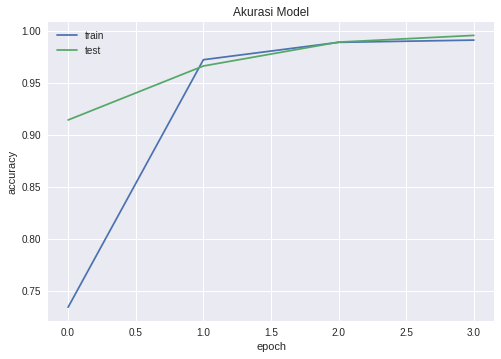

In [120]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

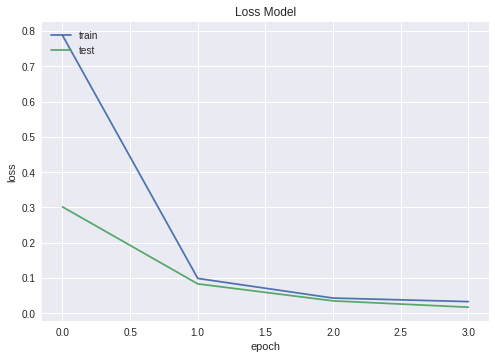

In [121]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

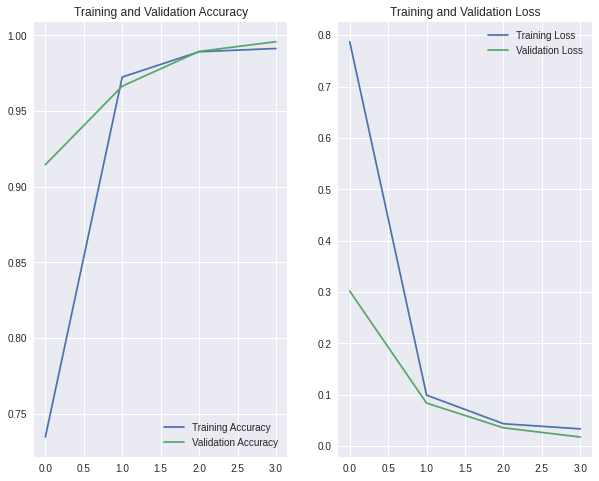

In [122]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving orange.jpg to orange.jpg
Orange


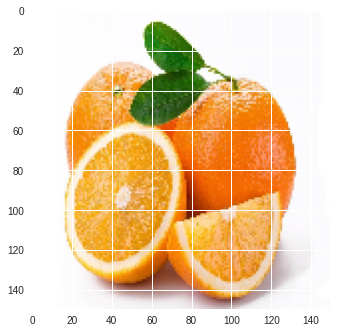

In [123]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [124]:
classes

array([[2.3802077e-07, 9.6210497e-09, 1.2749766e-07, 1.4262913e-06,
        9.9999809e-01, 1.4563912e-07]], dtype=float32)

### **Save Model**

In [125]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 12564
drwxr-xr-x 2 root root     4096 Jun  3 08:06 assets
-rw-r--r-- 1 root root  1308111 Jun  3 08:06 keras_metadata.pb
-rw-r--r-- 1 root root 11545312 Jun  3 08:06 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  3 08:06 variables


In [126]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v5.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v5.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [127]:
try:
    files.download('fruitsvegetable_02_v5.tflite')
    files.download('fruitsvegetable_02_v5.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [128]:
from keras.models import load_model
saved_model = load_model('best_model_2_v5.h5')

In [129]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 12548
drwxr-xr-x 2 root root     4096 Jun  3 08:07 assets
-rw-r--r-- 1 root root  1308111 Jun  3 08:07 keras_metadata.pb
-rw-r--r-- 1 root root 11527438 Jun  3 08:07 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  3 08:07 variables


In [130]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v5_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v5_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [131]:
try:
    files.download('fruitsvegetable_02_v5_best.tflite')
    files.download('fruitsvegetable_02_v5_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 06**

In [132]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-06-03 08:08:10--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  82.9MB/s    in 1.0s    

2021-06-03 08:08:12 (82.9 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [133]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(local_weights_file)

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_12[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [134]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [135]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense(6, activation='softmax')(x) 

model = tf.keras.Model(pre_trained_model.input, x)

In [136]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_12[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [137]:
# Fine Tuning
NUM_LAYERS = 10 #@param {type:"slider", min:1, max:50, step:1}
do_fine_tuning = True #@param {type:"boolean"}

if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.9)
    
    for layer in model.layers[-NUM_LAYERS:]:
        layer.trainable = True

    # Make all the layers in the pre-trained model trainable
    for layer in pre_trained_model.layers:
        layer.trainable = True
else:
    optimizer = 'adam'

    # Make all the layers in the pre-trained model non-trainable
    for layer in pre_trained_model.layers:
        layer.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [138]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [139]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [140]:
mc = ModelCheckpoint('best_model_2_v6.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [141]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/50
 6/69 [=>............................] - ETA: 1:08 - loss: 1.6059 - accuracy: 0.3268

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


69/69 [==============================] - ETA: 0s - loss: 0.6504 - accuracy: 0.7837

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


69/69 [==============================] - 106s 1s/step - loss: 0.6504 - accuracy: 0.7837 - val_loss: 0.3991 - val_accuracy: 0.8405

Epoch 00001: val_accuracy improved from -inf to 0.84053, saving model to best_model_2_v6.h5
Epoch 2/50
69/69 [==============================] - 96s 1s/step - loss: 0.1015 - accuracy: 0.9723 - val_loss: 0.0954 - val_accuracy: 0.9710

Epoch 00002: val_accuracy improved from 0.84053 to 0.97105, saving model to best_model_2_v6.h5
Epoch 3/50
69/69 [==============================] - 95s 1s/step - loss: 0.0492 - accuracy: 0.9870 - val_loss: 0.0400 - val_accuracy: 0.9899

Epoch 00003: val_accuracy improved from 0.97105 to 0.98989, saving model to best_model_2_v6.h5
Epoch 4/50
69/69 [==============================] - 95s 1s/step - loss: 0.0345 - accuracy: 0.9910 - val_loss: 0.0315 - val_accuracy: 0.9931

The accuracy of the training set and the validation set has reached > 99%!

Epoch 00004: val_accuracy improved from 0.98989 to 0.99311, saving model to best_model_2

In [142]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

 4/70 [>.............................] - ETA: 1:12 - loss: 0.0210 - accuracy: 0.9961

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


70/70 [==============================] - 72s 1s/step - loss: 0.0204 - accuracy: 0.9942


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


18/18 [==============================] - 19s 1s/step - loss: 0.0348 - accuracy: 0.9924
Accuracy (train):  0.9941710829734802
Accuracy: (test) 0.9923903346061707


### **Plot Model**

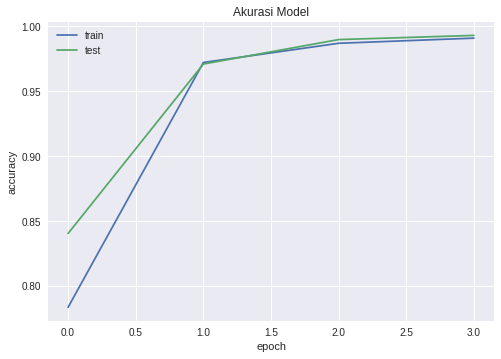

In [143]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

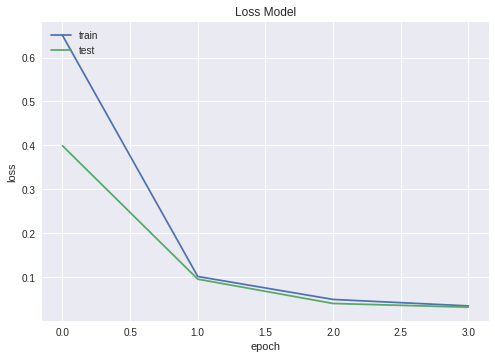

In [144]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

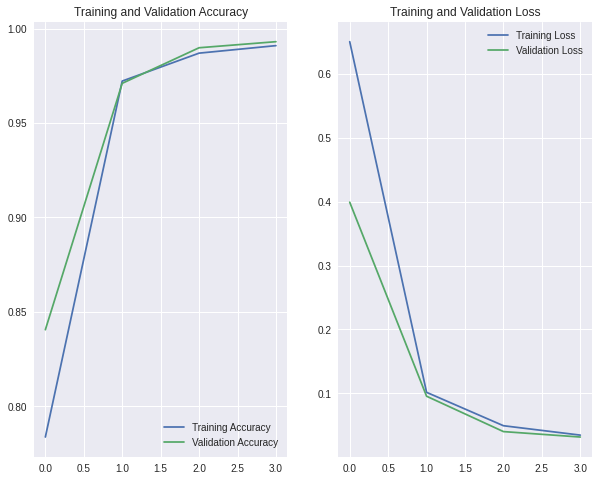

In [145]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving tomato.jpg to tomato.jpg
Tomato


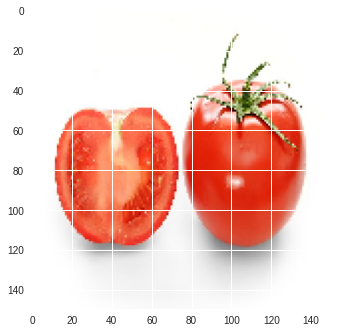

In [146]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [147]:
classes

array([[6.5421008e-02, 9.0980146e-04, 2.0132988e-04, 4.7350265e-03,
        8.9128045e-03, 9.1982007e-01]], dtype=float32)

### **Save Model**

In [148]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 5380
drwxr-xr-x 2 root root    4096 Jun  3 08:30 assets
-rw-r--r-- 1 root root  480157 Jun  3 08:30 keras_metadata.pb
-rw-r--r-- 1 root root 5016571 Jun  3 08:30 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  3 08:30 variables


In [149]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v6.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v6.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [150]:
try:
    files.download('fruitsvegetable_02_v6.tflite')
    files.download('fruitsvegetable_02_v6.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [151]:
from keras.models import load_model
saved_model = load_model('best_model_2_v6.h5')

In [152]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 5380
drwxr-xr-x 2 root root    4096 Jun  3 08:31 assets
-rw-r--r-- 1 root root  480157 Jun  3 08:31 keras_metadata.pb
-rw-r--r-- 1 root root 5016804 Jun  3 08:31 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  3 08:31 variables


In [153]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v6_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v6_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [154]:
try:
    files.download('fruitsvegetable_02_v6_best.tflite')
    files.download('fruitsvegetable_02_v6_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 07**

In [155]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import VGG19

model = tf.keras.models.Sequential([
    VGG19(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])
model.layers[0].trainable = False

80142336/80134624 [==============================] - 1s 0us/step


In [156]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 1542      
Total params: 24,352,070
Trainable params: 4,327,686
Non-trainable params: 20,024,384
_________________________________________________________________


In [157]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [158]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [159]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [160]:
mc = ModelCheckpoint('best_model_2_v7.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [161]:
# history = model.fit(train_generator,
#                               validation_data=validation_generator,
#                               steps_per_epoch=100,
#                               epochs=15,
#                               validation_steps=50,
#                               verbose=2)

In [162]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/50
12/69 [====>.........................] - ETA: 1:00 - loss: 4.8675 - accuracy: 0.3822

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


69/69 [==============================] - ETA: 0s - loss: 1.5544 - accuracy: 0.5963

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


69/69 [==============================] - 117s 2s/step - loss: 1.5544 - accuracy: 0.5963 - val_loss: 0.7786 - val_accuracy: 0.6756

Epoch 00001: val_accuracy improved from -inf to 0.67555, saving model to best_model_2_v7.h5
Epoch 2/50
69/69 [==============================] - 95s 1s/step - loss: 0.5771 - accuracy: 0.7574 - val_loss: 0.4472 - val_accuracy: 0.8373

Epoch 00002: val_accuracy improved from 0.67555 to 0.83732, saving model to best_model_2_v7.h5
Epoch 3/50
69/69 [==============================] - 96s 1s/step - loss: 0.4255 - accuracy: 0.8270 - val_loss: 0.2633 - val_accuracy: 0.9095

Epoch 00003: val_accuracy improved from 0.83732 to 0.90947, saving model to best_model_2_v7.h5
Epoch 4/50
69/69 [==============================] - 96s 1s/step - loss: 0.3263 - accuracy: 0.8699 - val_loss: 0.3214 - val_accuracy: 0.8649

Epoch 00004: val_accuracy did not improve from 0.90947
Epoch 5/50
69/69 [==============================] - 97s 1s/step - loss: 0.2887 - accuracy: 0.8854 - val_loss:

In [163]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

 7/70 [==>...........................] - ETA: 1:12 - loss: 0.0597 - accuracy: 0.9788

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


10/18 [===============>..............] - ETA: 8s - loss: 0.1003 - accuracy: 0.9672

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


18/18 [==============================] - 25s 1s/step - loss: 0.0993 - accuracy: 0.9664
Accuracy (train):  0.9739939570426941
Accuracy: (test) 0.9664279222488403


### **Plot Model**

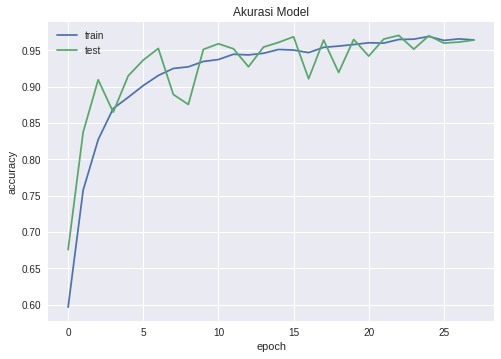

In [164]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

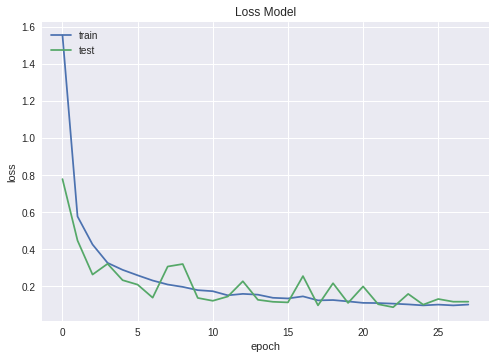

In [165]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

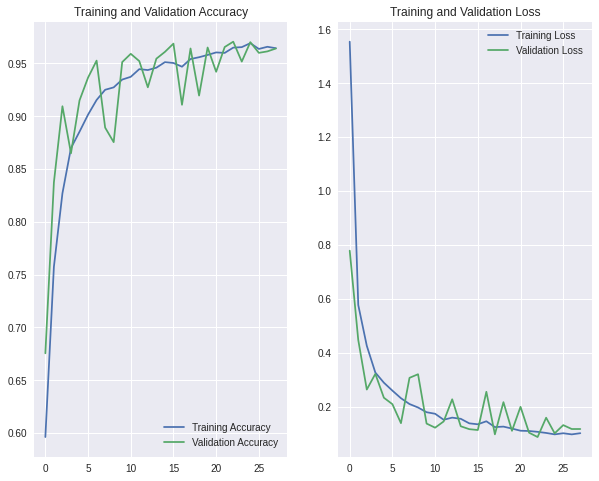

In [166]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving orange.jpg to orange (1).jpg
Orange


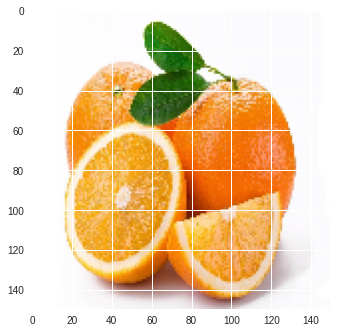

In [167]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [168]:
classes

array([[7.4687139e-03, 2.8126141e-07, 4.5182847e-07, 2.1087477e-05,
        9.9250680e-01, 2.5648949e-06]], dtype=float32)

### **Save Model**

In [169]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 636
drwxr-xr-x 2 root root   4096 Jun  3 09:32 assets
-rw-r--r-- 1 root root  92593 Jun  3 09:32 keras_metadata.pb
-rw-r--r-- 1 root root 547921 Jun  3 09:32 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 09:32 variables


In [170]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v7.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v7.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [171]:
try:
    files.download('fruitsvegetable_02_v7.tflite')
    files.download('fruitsvegetable_02_v7.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [172]:
from keras.models import load_model
saved_model = load_model('best_model_2_v7.h5')

In [173]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 636
drwxr-xr-x 2 root root   4096 Jun  3 09:33 assets
-rw-r--r-- 1 root root  92592 Jun  3 09:33 keras_metadata.pb
-rw-r--r-- 1 root root 546846 Jun  3 09:33 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 09:33 variables


In [174]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v7_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v7_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [175]:
try:
    files.download('fruitsvegetable_02_v7_best.tflite')
    files.download('fruitsvegetable_02_v7_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 08**

In [176]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


In [177]:
import tensorflow_hub as hub
do_fine_tuning = True #@param {type:"boolean"}

feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,), 
                                   output_shape=[FV_SIZE],
                                   trainable=do_fine_tuning)

model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(len(list_category), activation='softmax')
])

In [178]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 7686      
Total params: 2,265,670
Trainable params: 2,231,558
Non-trainable params: 34,112
_________________________________________________________________


In [196]:
if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(0.002, momentum=0.9)
    feature_extractor.trainable = True
else: 
    feature_extractor.trainable = False
    optimizer = "adam"

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [197]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [198]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [199]:
mc = ModelCheckpoint('best_model_2_v8.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [200]:
batch_size = 128
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size =IMAGE_SIZE,
    batch_size = batch_size,
    class_mode = 'categorical'
)

validation_generator = train_datagen.flow_from_directory(
    validation_directory,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 8921 images belonging to 6 classes.
Found 2234 images belonging to 6 classes.


In [201]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/50
 9/69 [==>...........................] - ETA: 1:50 - loss: 0.0997 - accuracy: 0.9983

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


69/69 [==============================] - ETA: 0s - loss: 0.0984 - accuracy: 0.9974

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


69/69 [==============================] - 161s 2s/step - loss: 0.0984 - accuracy: 0.9974 - val_loss: 0.1028 - val_accuracy: 0.9949

The accuracy of the training set and the validation set has reached > 99%!

Epoch 00001: val_accuracy improved from -inf to 0.99494, saving model to best_model_2_v8.h5


In [202]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

35/70 [==============>...............] - ETA: 55s - loss: 0.0965 - accuracy: 0.9969

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


15/18 [========================>.....] - ETA: 4s - loss: 0.0997 - accuracy: 0.9964

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


18/18 [==============================] - 28s 2s/step - loss: 0.1014 - accuracy: 0.9951
Accuracy (train):  0.9974218010902405
Accuracy: (test) 0.9950761198997498


### **Plot Model**

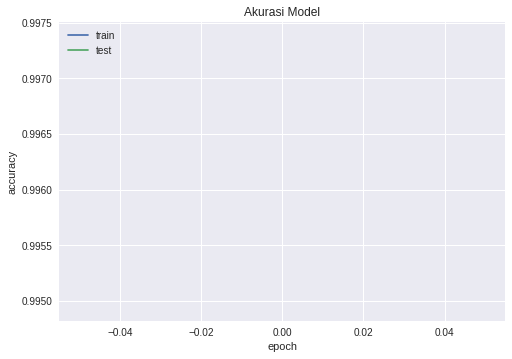

In [203]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

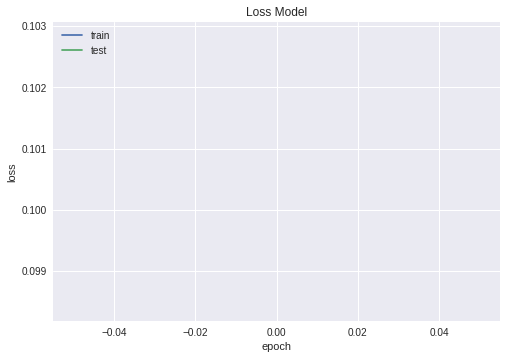

In [204]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

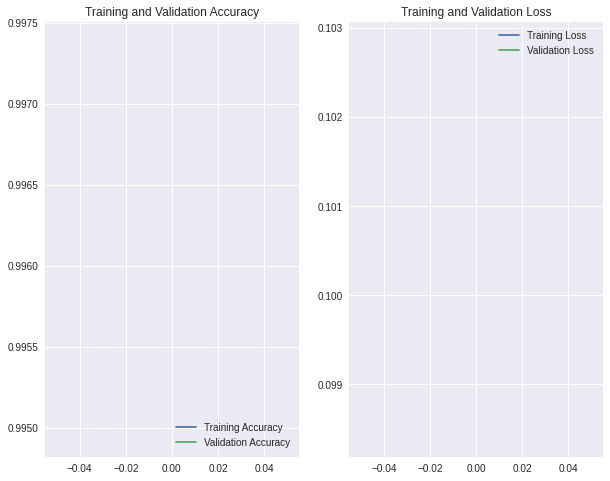

In [205]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving apple.jpg to apple (1).jpg
Apple


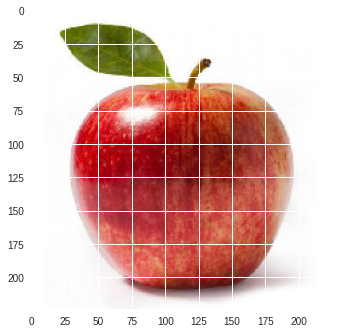

In [206]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=IMAGE_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [207]:
classes

array([[9.99673247e-01, 2.47993376e-06, 1.36452775e-06, 9.84872622e-06,
        1.28615375e-05, 3.00167332e-04]], dtype=float32)

### **Save Model**

In [208]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets


INFO:tensorflow:Assets written to: /tmp/1/assets



export_path = /tmp/1
total 2708
drwxr-xr-x 2 root root    4096 Jun  3 09:51 assets
-rw-r--r-- 1 root root    5228 Jun  3 09:51 keras_metadata.pb
-rw-r--r-- 1 root root 2754462 Jun  3 09:51 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  3 09:51 variables


In [209]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v8.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v8.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [210]:
try:
    files.download('fruitsvegetable_02_v8.tflite')
    files.download('fruitsvegetable_02_v8.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [212]:
from keras.models import load_model
saved_model = load_model('best_model_2_v8.h5', custom_objects={'KerasLayer':hub.KerasLayer})

In [213]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up



INFO:tensorflow:Assets written to: /tmp/2/assets


INFO:tensorflow:Assets written to: /tmp/2/assets



export_path = /tmp/2
total 2032
drwxr-xr-x 2 root root    4096 Jun  3 09:52 assets
-rw-r--r-- 1 root root    3552 Jun  3 09:52 keras_metadata.pb
-rw-r--r-- 1 root root 2066182 Jun  3 09:52 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  3 09:52 variables


In [214]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_02_v8_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_02_v8_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [215]:
try:
    files.download('fruitsvegetable_02_v8_best.tflite')
    files.download('fruitsvegetable_02_v8_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>